## Current Python Version

Ensure the python version running in the jupyter kernel is the same as expected

In [ ]:
from platform import python_version

print(python_version())

List installed packages, should match the ones in the pipfile (and their dependencies)

In [ ]:
pip list

## Internal Module Imports
Code required to enable project's internally defined modulos into the jupyter notebook environment

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# from electricity import ElectricalSystem, Load, Generator
from dto import SystemHistory, NodeStatePower, COST_PRESETS, ElectricalSystemSpecs, LoadSpecs, GeneratorSpecs
from learning import ModelTrainer, ModelTester, LearningParams

/home/fmello/.local/share/virtualenvs/2019-MSc_Thesis-4pUnri4s/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fmello/.local/share/virtualenvs/2019-MSc_Thesis-4pUnri4s/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fmello/.local/share/virtualenvs/2019-MSc_Thesis-4pUnri4s/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 

Determine the experiment params

In [3]:
LearningParams(
    gamma=0.9,   # Gamma (Discount)
    tau=0.001, # Tau
    epsilon=0.99,  # Epsilon
    numEpisodes=1000, # Number of learning episodes to run
    maxSteps=100,   # Number of steps per learning episode
    traceLength=8,     # Number of steps each sampled episode should contain
    batchSize=4,     # Number of episodes sampled from experience buffer
)
  

LearningParams(gamma=0.9, tau=0.001, epsilon=0.99, numEpisodes=1000, maxSteps=100, traceLength=8, batchSize=4, nnShape=NeuralNetworkShape(layer_00_ltsm=100, layer_01_mlp_01=1000, layer_02_mlp_02=100, layer_03_mlp_03=50, layer_04_mlp_04=1))

Determine Electrical System Specs to be used

In [5]:
elecSysSpecs = ElectricalSystemSpecs(
        loads=[LoadSpecs(id_="L1", basePower=3)],
        generators=[
            GeneratorSpecs(id_="G1", basePower=1.5, costProfile=COST_PRESETS.COAL, minPower=0.1, maxPower=6.0),
            GeneratorSpecs(id_="G2", basePower=1.5, costProfile=COST_PRESETS.OIL, minPower=0.1, maxPower=4.0),
        ],
        noiseLevel=0.1, #Allow for 10% variability to base levels
)

Train Agents

In [6]:
allAgents = ModelTrainer.trainAgents(elecSysSpecs)

W0809 23:44:31.226372 140545307707136 deprecation_wrapper.py:119] From /mnt/c/Users/flavi/Documents/Study/City-UniLondon/Thesis/2019-MSc_Thesis/app/learning/maddpg_actor.py:13: The name tf.trainable_variables is deprecated. Please use tf.compat.v1.trainable_variables instead.

W0809 23:44:31.249373 140545307707136 deprecation_wrapper.py:119] From /mnt/c/Users/flavi/Documents/Study/City-UniLondon/Thesis/2019-MSc_Thesis/app/learning/maddpg_actor.py:17: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 23:44:32.090798 140545307707136 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0809 23:44:32.091942 140545307707136 

TrainingModel: 0.0% 0.5% 1.0% 1.5% 2.0% 2.5% 3.0% 3.5% 4.0% 4.5% 5.0% 5.5% 6.0% 6.5% 7.0% 7.5% 8.0% 8.5% 9.0% 9.5% 

In [7]:
electricalSystem = ModelTester.testAgents(elecSysSpecs, allAgents)

Finished testing


Alternatively, one can plot the data to better inspect the progression

In [8]:
import matplotlib.pyplot as plt

/home/fmello/.local/share/virtualenvs/2019-MSc_Thesis-4pUnri4s/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


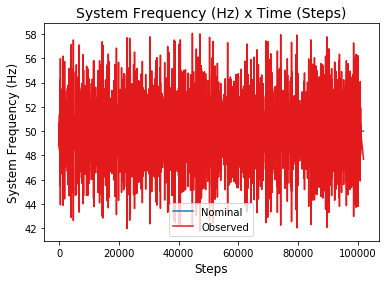

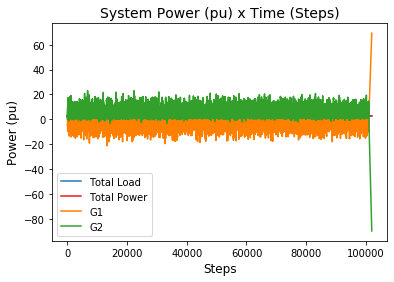

<Figure size 432x288 with 0 Axes>

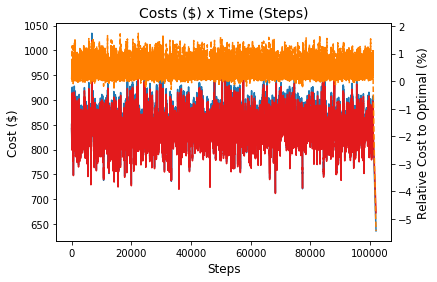

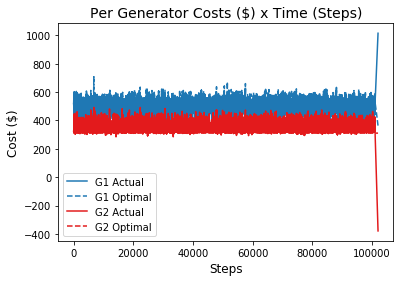

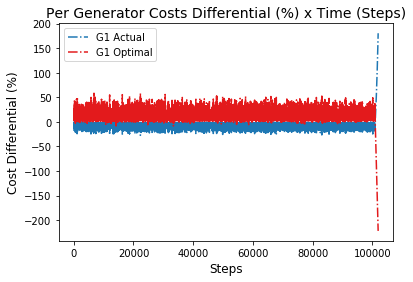

In [9]:
from plots import plotAll

plotAll(electricalSystem.systemHistory)